# Online Joint State and Parameters Estimation for AR SSM
State space model
\begin{align*}
    &\mathbf{x}_t = A(\theta)\mathbf{x}_{t-1} + \mathbf{c}v_{t} \quad v_t \sim \mathcal{N}(0, \gamma_x^{-1}) \\
    &y_t = \mathbf{c}^{\top} \theta_t^{(0)} + w_t \quad w_t \sim \mathcal{N}(0, \gamma_y^{-1})
\end{align*}

or

Probabilistic model
\begin{align}
  p&(\mathbf{X}, \mathbf{y}, \theta, \gamma) = \underbrace{p(\mathbf{x}_0)p(\gamma_x)p(\gamma_y)p(\theta)}_{\text{priors}}\prod_{t=1}^{T}\underbrace{p(y_t|\mathbf{x}_t, \gamma_y)}_{\text{observation}}\underbrace{p(\mathbf{x}_t|\mathbf{x}_{t-1}, \theta, \gamma_x)}_{\text{state transition}}  \\
    p&(y_t|\mathbf{x}_t, \gamma_y) = \mathcal{N}\Bigl(y_t|\mathbf{x}_{t}, \gamma_y^{-1}\Bigr) \\
  p&(\mathbf{x}_t|\mathbf{x}_{t-1}, \theta, \gamma_x) = \mathcal{N}\Bigl(\mathbf{x}_t|A(\theta)\mathbf{x}_{t-1}, V\Bigr) \\
  p&(\mathbf{x}_0) = \mathcal{N}(\mathbf{x}_0|m_{\mathbf{x}_{0}}, V_{\mathbf{x}_{0}})  \\
  p&(\theta) = \mathcal{N}(\theta|m_{\theta}, V_{\theta}) \\
  p&(\gamma_x) = \Gamma(\gamma_x|\alpha_x, \beta_x) 
\end{align}

where
\begin{align*}
    &\mathbf{x}_t = (x_t, x_{t-1}, \dots, x_{t-p+1})^\top \quad \mathbf{x}_{t-1} = (x_{t-1}, x_{t-2}, \dots, x_{t-p})^\top \quad \mathbf{c} = (1, 0, ..., 0)^{\top} \\ \\
    &A(\theta) = 
    \begin{bmatrix}
         \theta^{\top}  \\
         \mathbf{I}_{M-1} \quad \mathbf{0}
    \end{bmatrix}
    \, , \quad
    \mathbf{I}_M = 
    \begin{bmatrix}
        1_1 & 0 &  \dots & 0 \\ 
        0 & 1_2 &  \dots & 0 \\   
        \vdots &  \vdots & \ddots & \vdots \\
        0 & 0  & \dots & 1_{M}
    \end{bmatrix} \, ,\quad
      V= \begin{bmatrix}
            1/\gamma & 0 &\dots & 0 \\ 
            0 & \epsilon & \dots & 0 \\   
            \vdots & \vdots & \ddots & \vdots \\
             0 & 0 & \dots & \epsilon
    \end{bmatrix}
\end{align*}

┌ Info: Precompiling Images [916415d5-f1e6-5110-898d-aaa5f9f070e0]
└ @ Base loading.jl:1273
  likely near /Users/albertpod/.julia/packages/CoordinateTransformations/IrN9A/src/CoordinateTransformations.jl:6
┌ Info: Precompiling QuartzImageIO [dca85d43-d64c-5e67-8c65-017450d5d020]
└ @ Base loading.jl:1273


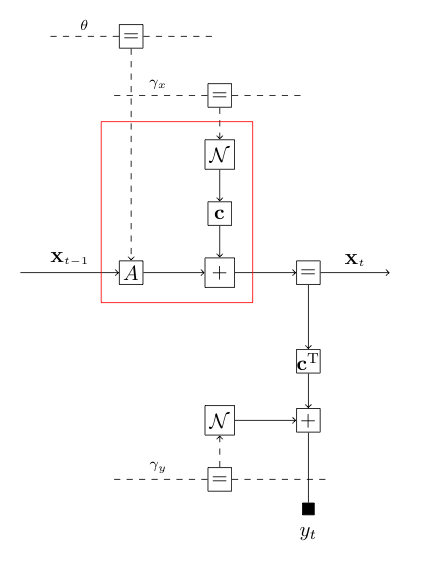

In [1]:
using Images
img = load("ffgs/AR-online.png")

The central quantity of our interest is a joint estimation of the AR coefficients $\theta$, precision of process noise $\gamma_x$ and states $\mathbf{x}_n$, while setting measurement noise precisions $\gamma_y=0.5$.

In [10]:
using Random
using LaTeXStrings
using Plots
# include("../data/DataAR.jl")
# include("../models/ForneyAR.jl")
# include("../helpers/functions.jl")
import FLAR: logPDF, wmse
using FLAR.AR, FLAR.DataAR
using ForneyLab

In [2]:
import ForneyLab: unsafeCov, unsafeMean, unsafePrecision

In [3]:
Random.seed!(42)

# Define the order and data
ARorder = 5

# AR data
v_x = 1.0 # process noise variance
coefs, dataAR = generateAR(1000, ARorder, nvar=v_x, stat=true)
#coefs, dataAR, tvar, rw = generateHGFAR(1000, 2, 1, -1, 0.01)
x = [x[1] for x in dataAR]
#dataAR = loadAR("../data/temperature.csv", col=:Temp, delim=",")

v_y = 10.0 # measurement noise variance
# Observations

y = [x[1] + sqrt(v_y)*randn() for x in dataAR];

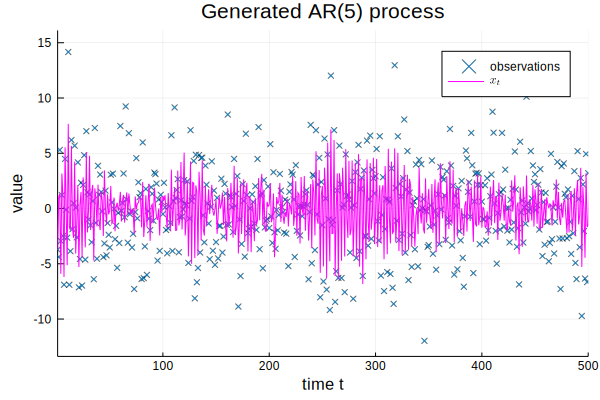

In [5]:
from = 1; upto = 500;
plot(xlims=(from, upto))
scatter!(y, markershape = :xcross, markeralpha = 0.6, markersize = 2, xlabel="time t", ylabel="value", label="observations")
plot!(x, color=:magenta, label=L"x_t", title="Generated AR($ARorder) process")

In [4]:
gar, qar = buildGraphAR(ARorder)
#setCurrentGraph(gar)
ForneyLab.draw(gar)

<?xml version="1.0" encoding="UTF-8" standalone="no"?>
<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN"
 "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">
<!-- Generated by graphviz version 2.40.1 (20161225.0304)
 -->
<!-- Title: G Pages: 1 -->
 
 
 G 
 
<!-- 13898291684813476867 -->
 
 13898291684813476867 
 
 𝒩 
 gaussianmeanprecision_1 
 
<!-- 9836479372536187245 -->
 
 9836479372536187245 
 
 placeholder_m_θ_t 
 
<!-- 13898291684813476867--9836479372536187245 -->
 
 13898291684813476867--9836479372536187245 
 
 m_θ_t 
 1 out 
 2 m 
 
<!-- 12554614805670104786 -->
 
 12554614805670104786 
 
 placeholder_w_θ_t 
 
<!-- 13898291684813476867--12554614805670104786 -->
 
 13898291684813476867--12554614805670104786 
 
 w_θ_t 
 1 out 
 3 w 
 
<!-- 16363747276187828647 -->
 
 16363747276187828647 
 
 clamp_1 
 
<!-- 2663943118374254686 -->
 
 2663943118374254686 
 
 Gam 
 gamma_1 
 
<!-- 4455330433888662693 -->
 
 4455330433888662693 
 
 placeholder_b_w_t 
 
<!-- 2663943118374254686--4455330433888662693 -->
 
 2663943118374254686--4455330433888662693 
 
 b_w_t 
 1 out 
 3 b 
 
<!-- 12051316359851269584 -->
 
 12051316359851269584 
 
 placeholder_a_w_t 
 
<!-- 2663943118374254686--12051316359851269584 -->
 
 2663943118374254686--12051316359851269584 
 
 a_w_t 
 1 out 
 2 a 
 
<!-- 1444013773271388869 -->
 
 1444013773271388869 
 
 dot 
 dotproduct_1 
 
<!-- 1444013773271388869--16363747276187828647 -->
 
 1444013773271388869--16363747276187828647 
 
 clamp_1 
 1 out 
 3 in2 
 
<!-- 13751990817716539793 -->
 
 13751990817716539793 
 
 AR 
 autoregressive_1 
 
<!-- 1444013773271388869--13751990817716539793 -->
 
 1444013773271388869--13751990817716539793 
 
 x_t 
 1 y 
 2 in1 
 
<!-- 7963799923066748915 -->
 
 7963799923066748915 
 
 𝒩 
 gaussianmeanprecision_2 
 
<!-- 3388317523934382616 -->
 
 3388317523934382616 
 
 placeholder_w_x_t_prev 
 
<!-- 7963799923066748915--3388317523934382616 -->
 
 7963799923066748915--3388317523934382616 
 
 w_x_t_prev 
 1 out 
 3 w 
 
<!-- 8489227756002538844 -->
 
 8489227756002538844 
 
 placeholder_m_x_t_prev 
 
<!-- 7963799923066748915--8489227756002538844 -->
 
 7963799923066748915--8489227756002538844 
 
 m_x_t_prev 
 1 out 
 2 m 
 
<!-- 16088954596301391062 -->
 
 16088954596301391062 
 
 placeholder_w_y_t 
 
<!-- 9580585468264744049 -->
 
 9580585468264744049 
 
 𝒩 
 gaussianmeanprecision_3 
 
<!-- 9580585468264744049--1444013773271388869 -->
 
 9580585468264744049--1444013773271388869 
 
 variable_1 
 1 out 
 2 m 
 
<!-- 9580585468264744049--16088954596301391062 -->
 
 9580585468264744049--16088954596301391062 
 
 w_y_t 
 1 out 
 3 w 
 
<!-- 13751990817716539793--13898291684813476867 -->
 
 13751990817716539793--13898291684813476867 
 
 θ 
 1 out 
 3 θ 
 
<!-- 13751990817716539793--2663943118374254686 -->
 
 13751990817716539793--2663943118374254686 
 
 γ 
 1 out 
 4 γ 
 
<!-- 13751990817716539793--7963799923066748915 -->
 
 13751990817716539793--7963799923066748915 
 
 x_t_prev 
 1 out 
 2 x 
 
<!-- 682183907202870033 -->
 
 682183907202870033 
 
 placeholder_y_t 
 
<!-- 682183907202870033--9580585468264744049 -->
 
 682183907202870033--9580585468264744049 
 
 y_t 
 1 out 
 1 out

In [5]:
using LinearAlgebra
diagAR(dim) = Matrix{Float64}(I, dim, dim)
prs = Dict(:m_θ=>randn(ARorder), :w_θ=>diagAR(ARorder),
           :m_x=>zeros(ARorder), :w_x=>diagAR(ARorder),
           :a=>0.0001, :b=>0.0001)

# If Julia throws an error just ignore and re-run the inference again
result = inferAR(qar, y, v_y, priors=prs);

Observed 100%|██████████████████████████████████████████| Time: 0:00:03


In [11]:
# Inspect the results
marginals = result[1]
posteriors = result[2]

m_x = posteriors[:m_x]
w_x = posteriors[:w_x]
m_θ = posteriors[:m_θ]
w_θ = posteriors[:w_θ]
a = posteriors[:a]
b = posteriors[:b]

m_ar = [x[1] for x in m_x]
v_ar = [v_x[1]^-1 for v_x in w_x[1:end]];

logPDFsAR = [logPDF(x[t], m_x[t][1], w_x[t][1]^-1) for t in 1:length(y)]
WMSEsAR = [wmse(x[1:t], [est[1] for est in m_x[1:t]], [est[1]^-1 for est in w_x[1:t]]) for t in 1:length(y)];

In [11]:
println("Coefs")
println("real = ", coefs)
println("estimated mean = ", unsafeMean(marginals[:θ]))
println("===============")
println("Noise")
println("real variance = ", v_x)
println("estimated variance = ", unsafeMean(marginals[:γ])^-1)

Coefs
real = [-0.441035, -0.0106585, 0.407541, -0.382486, -0.430636]
estimated mean = [-0.316375, 0.0550023, -0.528214, -0.425327, 1.45048]
Noise
real variance = 1.0
estimated variance = 4.009345464389283


In [12]:
# Doesn't really matter
println("Δ(estimated, real)=", mse(m_ar, x))
println("Δ(estimated, noise)=", mse(m_ar, y))
println("Δ(noise, actual)=", mse(y, x))

Δ(estimated, real)=3.641604581933899
Δ(estimated, noise)=7.754654163970457
Δ(noise, actual)=9.475893141147653


# Animation

In [13]:
v_x = v_ar # variances of estimated state
toshow = 10 # number of points to plot at once

anim = @animate for i in 1:length(m_ar)-toshow
    s = plot(xticks = i:div(toshow, 2):i+toshow);
    ylims!(minimum(y) - .1, maximum(y) + .1);
    scatter!(collect(i:i+toshow), y[i:i+toshow], label="noisy observations", 
            markershape = :xcross, markeralpha = 0.6,
            markersize = 2)
    
    plot!(collect(i:i+toshow), m_ar[i:i+toshow], ribbon=sqrt.(v_x[i:i+toshow]),
          linestyle=:dash, linewidth = 2, color=:black, fillalpha = 0.2, fillcolor = :black,
          label="inferred")
    
    plot!(collect(i:i+toshow), x[i:i+toshow], color = :magenta, linewidth = 1.0, label="real state")
end

Animation("/var/folders/jn/1xv7kskx42v_97gx1xd8y_g40000gq/T/tmpa3XiQ5", ["000001.png", "000002.png", "000003.png", "000004.png", "000005.png", "000006.png", "000007.png", "000008.png", "000009.png", "000010.png"  …  "000981.png", "000982.png", "000983.png", "000984.png", "000985.png", "000986.png", "000987.png", "000988.png", "000989.png", "000990.png"])

In [14]:
gif(anim, "../gifs/AR-LDS.gif", fps = 10)

┌ Info: Saved animation to 
│   fn = /Users/albertpod/Documents/Julia/VMP-AR/gifs/AR-LDS.gif
└ @ Plots /Users/albertpod/.julia/packages/Plots/Iuc9S/src/animation.jl:95


Plots.AnimatedGif("/Users/albertpod/Documents/Julia/VMP-AR/gifs/AR-LDS.gif")

In [15]:
# Plotting MSE
anim = @animate for i in 1:length(WMSEsAR)
    s = plot()
    ylims!(minimum(WMSEsAR) - 1, maximum(WMSEsAR) + 1)
    xlims!(1, length(WMSEsAR))
    plot!(collect(1:i), WMSEsAR[1:i], xlabel="observation", ylabel="WMSE", label="")
end;

In [16]:
gif(anim, "../gifs/MSE_evo_state.gif", fps = 100)

┌ Info: Saved animation to 
│   fn = /Users/albertpod/Documents/Julia/VMP-AR/gifs/MSE_evo_state.gif
└ @ Plots /Users/albertpod/.julia/packages/Plots/Iuc9S/src/animation.jl:95


Plots.AnimatedGif("/Users/albertpod/Documents/Julia/VMP-AR/gifs/MSE_evo_state.gif")